# Preparazione dei Dati
## Importa le librerie necessarie

In [2]:
import matplotlib
import numpy as np
import pandas as pd


# Adatto l'output stampato a schermo alla larghezza attuale della finestra
from IPython.display import HTML, display

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option("display.width", 1000)

# Cambio la palette dei colori standard per adattarli alla palette del sito
# definire i colori specificati dall'utente
colors = ["#0077b5", "#7cb82f", "#dd5143", "#00aeb3", "#8d6cab", "#edb220", "#262626"]

# cambiare la palette di colori di default
matplotlib.rcParams["axes.prop_cycle"] = matplotlib.cycler(color=colors)

## Carica i dati da file o da una fonte di dati esterna o interna

In [3]:
# https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_csv("UCI_Credit_Card.csv", sep=",", encoding="utf-8")

## Esplora e comprendi la struttura e le caratteristiche dei dati

In [4]:
# Visualizza le prime righe del dataframe
print(df.head())
print("\n --------------------------------- \n")
# Visualizza le informazioni sul dataframe, come il numero di righe, colonne, tipi di dati e valori nulli
df.info()
print("\n --------------------------------- \n")

# Visualizza le statistiche descrittive del dataframe, come la media, la deviazione standard, i valori minimi e massimi
print(df.describe())
print("\n --------------------------------- \n")

# Visualizza la frequenza delle modalità delle colonne categoriche
print(df.value_counts())
print("\n --------------------------------- \n")

# Mostra l'asimmetria della distribuzione delle colonne numeriche
#print(df.skew())
#print("\n --------------------------------- \n")
# Mostra la curtosi della distribuzione delle colonne numeriche
#print(df.kurt())
#print("\n --------------------------------- \n")
# Visualizza il numero di valori unici per ogni colonna
print(df.nunique())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2          2         1   24      2      2     -1     -1  ...        0.0        0.0        0.0       0.0     689.0       0.0       0.0       0.0       0.0                           1
1   2   120000.0    2          2         2   26     -1      2      0      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0                           1
2   3    90000.0    2          2         2   34      0      0      0      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0                           0
3   4    50000.0    2          2         1   37      0      0      0      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0                   

## Effettua la pulizia dei dati, come la gestione dei valori mancanti o la correzione degli errori

In [4]:
# Identifica le colonne con valori mancanti
missing_cols = df.columns[df.isnull().any()]

# Visualizza il numero e la percentuale di valori mancanti per ogni colonna
for col in missing_cols:
    num_missing = df[col].isnull().sum()
    pct_missing = num_missing / len(df) * 100
    print(f"{col}: {num_missing} ({pct_missing:.2f}%)")

## Effettua la normalizzazione, la standardizzazione o altre trasformazioni dei dati, se necessario

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Se le features hanno distribuzioni approssimativamente gaussiane
#scaler = StandardScaler()
#df_standardized = scaler.fit_transform(df)

# Se le distribuzioni sono diverse o non gaussiane
#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)


---
# Analisi esplorativa dei dati
## Visualizza e riassumi i dati utilizzando grafici, tabelle e statistiche descrittive


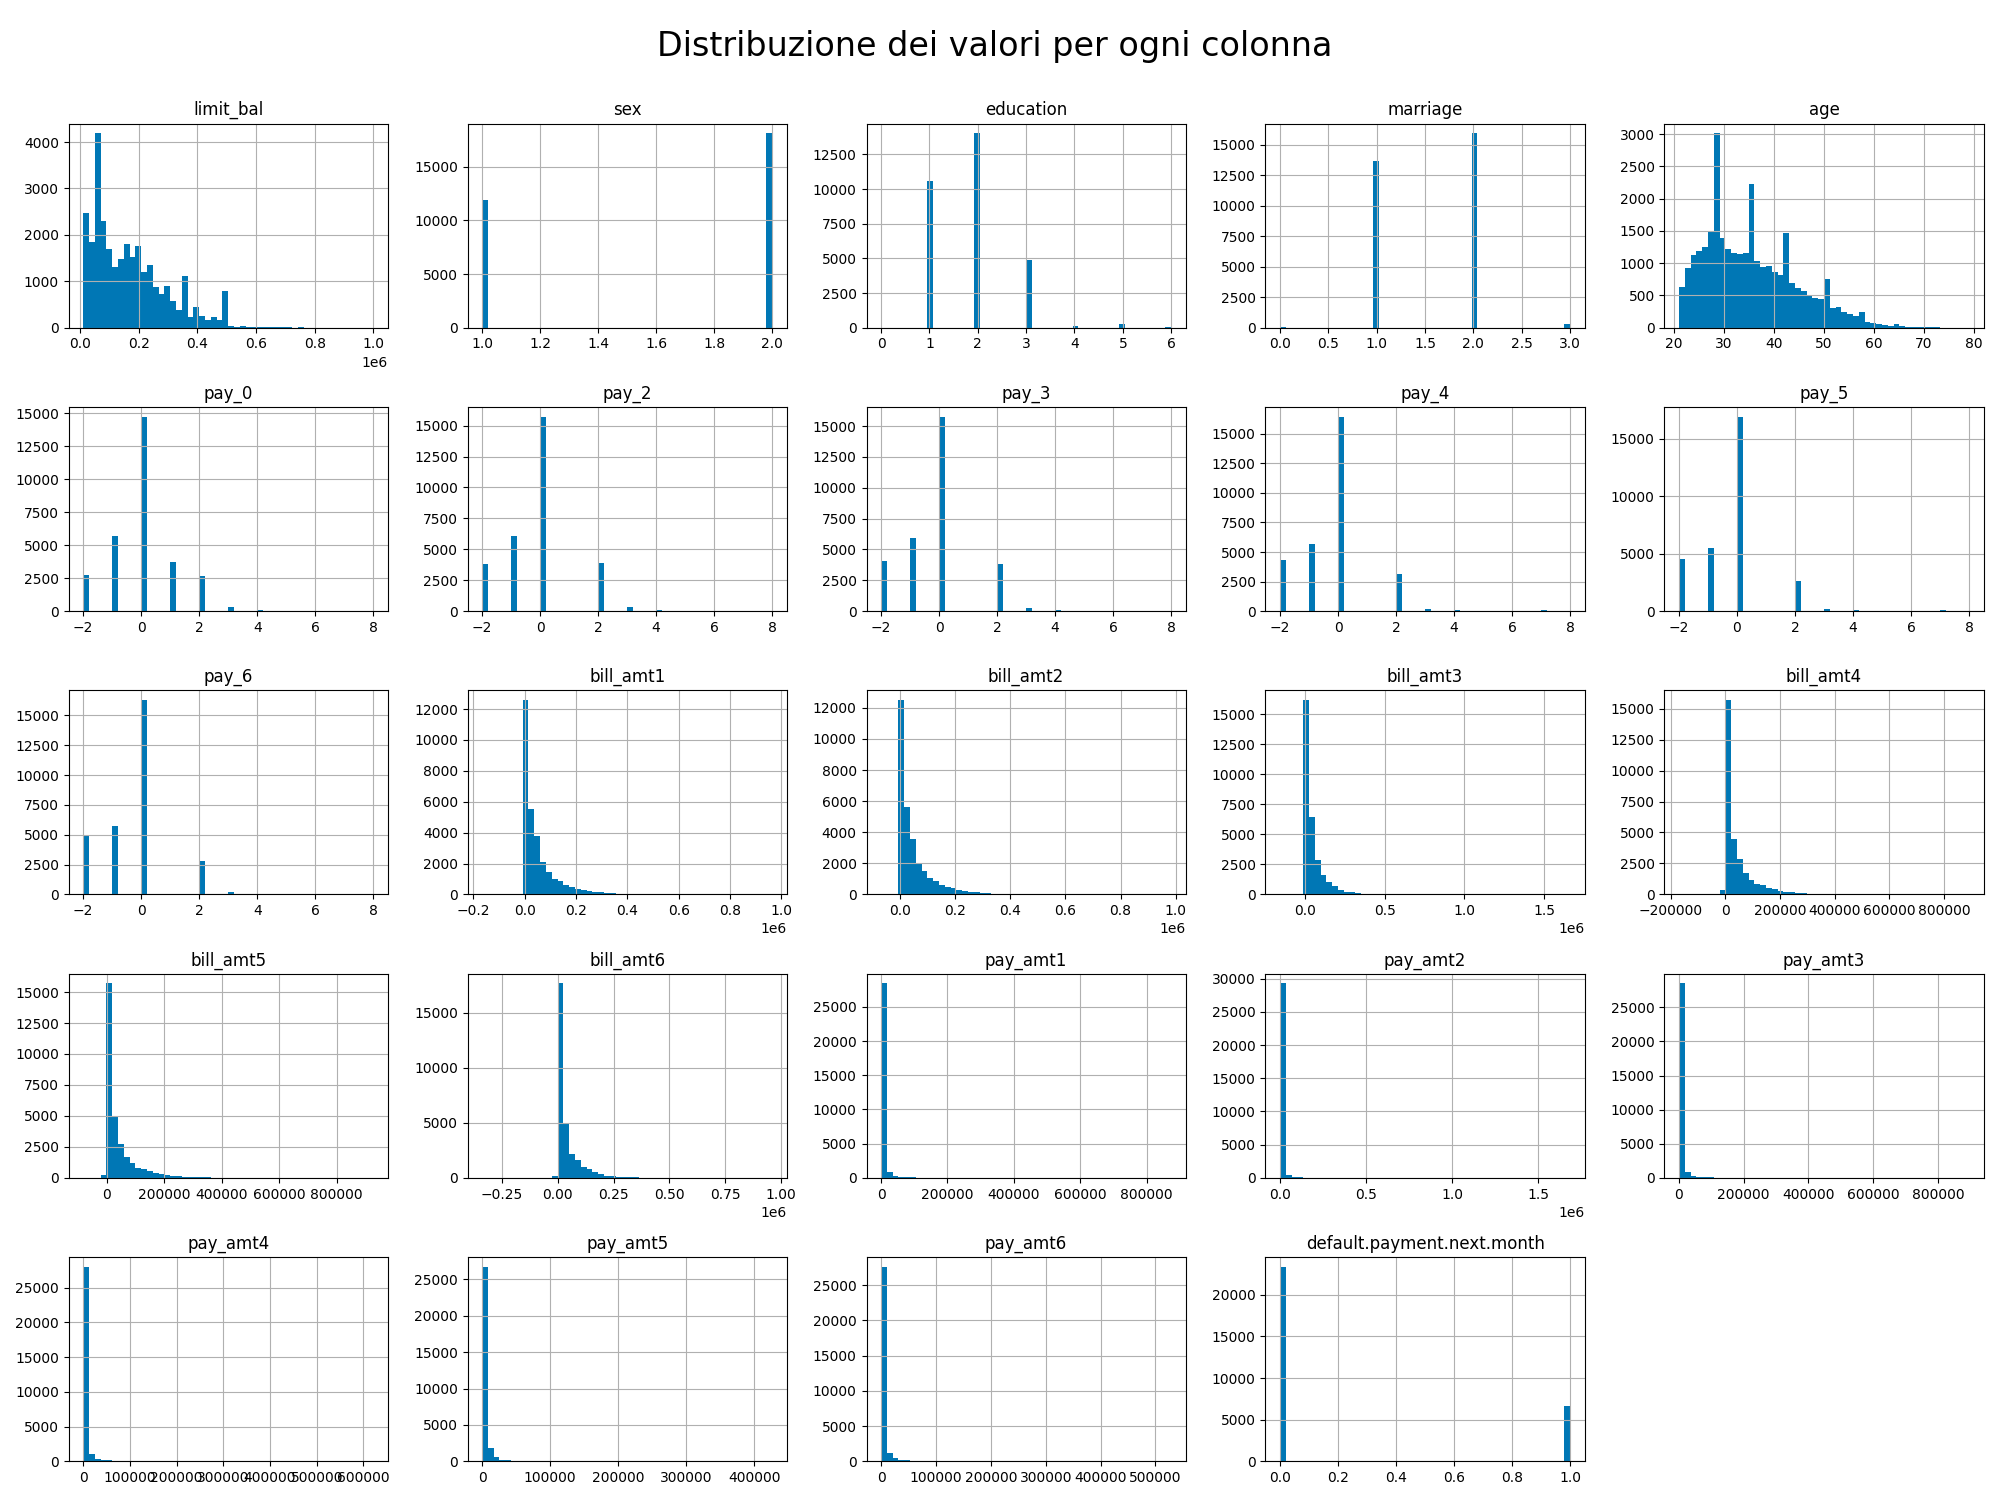

C:\Users\wolvi\AppData\Local\Temp\ipykernel_6252\3167810928.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Spectral", 256)


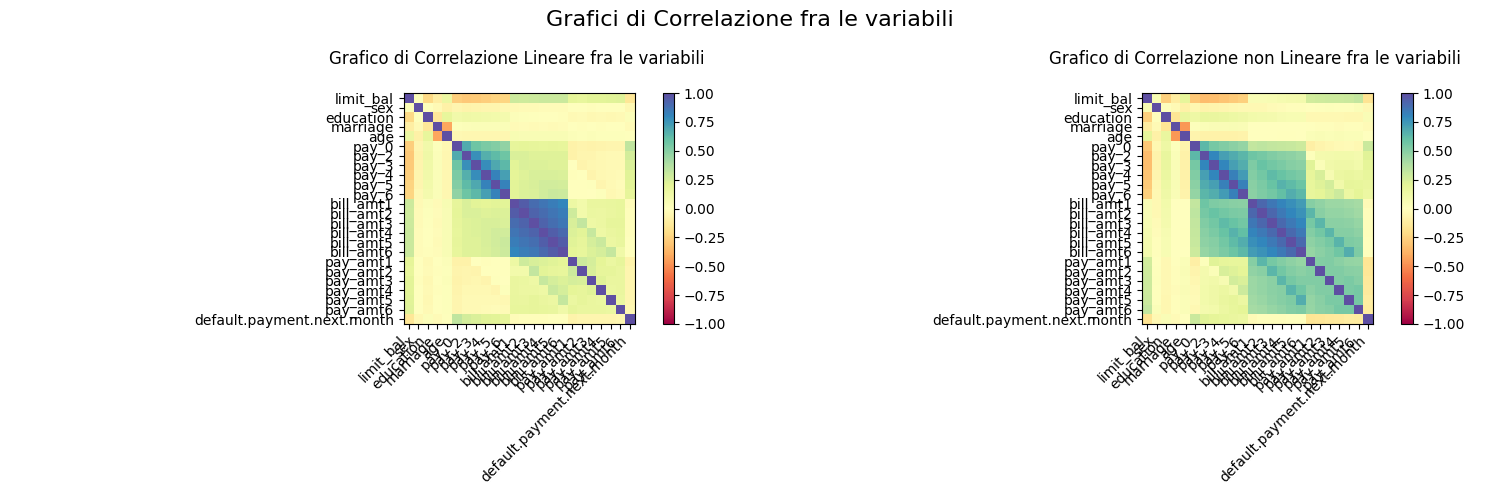

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Rimuovi  la prima colonna

df = df.iloc[:,1:]
# Trasforma i titoli delle colonne in minuscolo
df.columns = map(str.lower, df.columns)

# Correzione dei tipi di dati
# df["colonna_specifica"] = df["colonna_specifica"].astype(int)

# visualizzare la distribuzione dei valori per ogni colonna
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribuzione dei valori per ogni colonna \n", fontsize=24)
plt.tight_layout()
plt.show()

# Calcola la correlazione lineare tra le colonne
corr_matrix = df.corr(numeric_only=True)

# Crea una figura con due sottografici
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Crea una heatmap della matrice di correlazione lineare
cmap = plt.cm.get_cmap("Spectral", 256)
im1 = ax1.imshow(corr_matrix, cmap=cmap,clim=(-1, 1))
ax1.set_xticks(np.arange(corr_matrix.shape[1]))
ax1.set_yticks(np.arange(corr_matrix.shape[0]))
ax1.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax1.set_yticklabels(corr_matrix.index)
ax1.set_title("Grafico di Correlazione Lineare fra le variabili \n")
plt.colorbar(im1, ax=ax1)

# Calcola la correlazione non lineare tra le colonne
corr_matrix_non_lineare = df.corr(method="spearman", numeric_only=True)

# Crea una heatmap della matrice di correlazione non lineare
im2 = ax2.imshow(corr_matrix_non_lineare, cmap=cmap,clim=(-1, 1))
ax2.set_xticks(np.arange(corr_matrix_non_lineare.shape[1]))
ax2.set_yticks(np.arange(corr_matrix_non_lineare.shape[0]))
ax2.set_xticklabels(corr_matrix_non_lineare.columns, rotation=45, ha="right")
ax2.set_yticklabels(corr_matrix_non_lineare.index)
ax2.set_title("Grafico di Correlazione non Lineare fra le variabili \n")
plt.colorbar(im2, ax=ax2)

plt.suptitle("Grafici di Correlazione fra le variabili", fontsize=16)
plt.tight_layout()
plt.show()

## Identifica pattern, tendenze o anomalie nei dati


## Esegui analisi delle correlazioni tra le variabili


## Utilizza tecniche di visualizzazione dei dati per presentare informazioni chiave

---
# Preparazione dei dati per il modello
## Effettua la divisione dei dati in set di addestramento e set di test

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Prepara i dati
X = df.drop('default.payment.next.month', axis=1)  # Sostituisci 'default.payment.next.month' con il nome effettivo della colonna di destinazione
y = df['default.payment.next.month']


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## Applica tecniche di selezione delle caratteristiche o riduzione della dimensionalità, se necessario

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Divide il dataset in variabili indipendenti (X) e variabile target (y)
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

# Feature Importance con Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# Univariate Feature Selection con test del chi-quadro
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X_scaled, y)

#X_chi2 = chi2_selector.fit_transform(X, y)
selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("Univariate Feature Selection (Chi-square test):")
print(selected_features_chi2)

# RFE (Recursive Feature Elimination) con Random Forest
rfe_selector = RFE(estimator=rf, n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X, y)
selected_features_rfe = X.columns[rfe_selector.support_]
print("RFE (Recursive Feature Elimination):")
print(selected_features_rfe)


Feature Importance:
      Feature  Importance
5       pay_0    0.102599
4         age    0.067160
11  bill_amt1    0.060950
0   limit_bal    0.059846
12  bill_amt2    0.055040
13  bill_amt3    0.052565
17   pay_amt1    0.052157
14  bill_amt4    0.050703
16  bill_amt6    0.050195
15  bill_amt5    0.049636
18   pay_amt2    0.047576
22   pay_amt6    0.045793
19   pay_amt3    0.045419
20   pay_amt4    0.043055
21   pay_amt5    0.042951
6       pay_2    0.036469
7       pay_3    0.027936
8       pay_4    0.024663
9       pay_5    0.021375
2   education    0.020554
10      pay_6    0.017371
3    marriage    0.014082
1         sex    0.011906
Univariate Feature Selection (Chi-square test):
Index(['limit_bal', 'sex', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt5', 'pay_amt6'], dtype='object')
RFE (Recursive Feature Elimination):
Index(['pay_0', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt6'], dtype='object')


In [18]:
import pandas as pd
import scipy.stats as stats

def generate_dataset_report(df):
    report = pd.DataFrame(columns=['Features', 'Distribuzione', 'Modalità', 'Normalità', 'Tipo', 'Media', 'Varianza', 'Numero di valori unici', 'Bilanciamento', 'Bias'])

    for column in df.columns:
        column_info = {}
        column_info['Features'] = column
        column_info['Distribuzione'] = ""
        column_info['Modalità'] = ""
        column_info['Normalità'] = ""
        column_info['Tipo'] = ""
        column_info['Media'] = ""
        column_info['Varianza'] = ""
        column_info['N° valori unici'] = ""
        column_info['Bilanciamento'] = ""
        column_info['Bias'] = ""
        if pd.api.types.is_integer_dtype(df[column]):
            column_info['Tipo'] = 'discreta'
            column_info['Distribuzione'] = ""
            column_info['Modalità'] = ""
            column_info['Normalità'] = ""
            column_info['Media'] = ""
            column_info['Varianza'] = ""
            column_info['N° valori unici'] = df[column].nunique()
            column_info['Bilanciamento'] = "bilanciate" if df[column].nunique() <= 2 or df[column].value_counts(normalize=True).max() >= 0.8 else "sbilanciate"
            column_info['Bias'] = "con bias" if df[column].value_counts(normalize=True).max() >= 0.8 else "senza bias"
        elif pd.api.types.is_numeric_dtype(df[column]):
            column_info['Tipo'] = 'continua'
            column_info['Distribuzione'] = "simmetrica" if stats.skew(df[column]) < 0.5 else "asimmetrica"
            column_info['Modalità'] = "unimodale" if stats.kurtosis(df[column]) < 3 else "bimodale o multimodale"
            column_info['Normalità'] = "normale" if stats.normaltest(df[column]).pvalue > 0.05 else "non normale"
            column_info['Media'] = df[column].mean()
            column_info['Varianza'] = df[column].var()
            column_info['N° valori unici'] = ""
            column_info['Bilanciamento'] = ""
            column_info['Bias'] = ""
        elif pd.api.types.is_categorical_dtype(df[column]):
            column_info['Tipo'] = 'categorica'
            column_info['Distribuzione'] = ""
            column_info['Modalità'] = ""
            column_info['Normalità'] = ""
            column_info['Media'] = ""
            column_info['Varianza'] = ""
            column_info['N° valori unici'] = df[column].nunique()
            column_info['Bilanciamento'] = "bilanciate" if df[column].nunique() <= 2 or df[column].value_counts(normalize=True).max() >= 0.8 else "sbilanciate"
            column_info['Bias'] = "con bias" if df[column].value_counts(normalize=True).max() >= 0.8 else "senza bias"


        report = pd.concat([report, pd.DataFrame([column_info])], ignore_index=True)

    return report


report = generate_dataset_report(df)
print(report)

                      Features Distribuzione                Modalità    Normalità      Tipo          Media           Varianza Numero di valori unici Bilanciamento        Bias
0                    limit_bal   asimmetrica               unimodale  non normale  continua  167484.322667  16834455682.15729                                                 
1                          sex                                                     discreta                                                        2    bilanciate  senza bias
2                    education                                                     discreta                                                        7   sbilanciate  senza bias
3                     marriage                                                     discreta                                                        4   sbilanciate  senza bias
4                          age                                                     discreta                                  

## Gestisci eventuali sbilanciamenti di classe nei dati, ad esempio tramite campionamento o pesatura

In [ ]:
# Creazione del dataframe per la tabella
table_data = {}
for method, selected_features in zip(['Feature Importance', 'Univariate Feature Selection', 'RFE'],
                                     [feature_importance_df['Feature'], selected_features_chi2, selected_features_rfe]):
# Creazione del dataframe per la tabella
all_features = set(feature_importance_df['Feature']) | set(selected_features_chi2) | set(selected_features_rfe)
table_data = {}
for feature in all_features:
    table_data[feature] = [
        selected_features_feature_importance.tolist().count(feature) * 'Feature Importance',
        selected_features_chi2.tolist().count(feature) * 'Univariate Feature Selection',
        selected_features_rfe.tolist().count(feature) * 'RFE'
    ]

# Creazione del dataframe con caratteristiche separate
table_df = pd.DataFrame(table_data)

# Riempimento dei valori mancanti con NaN
table_df.fillna('', inplace=True)

# Stampa della tabella
print(table_df)

---
# Creazione e addestramento del modello
## Scegli l'algoritmo di machine learning o di data science appropriato per il tuo problema


## Configura gli iperparametri del modello


## Addestra il modello utilizzando il set di addestramento


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression



# Dividi il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Definisci il processo di selezione delle features e il modello di classificazione all'interno di una pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=chi2)),
    ('classification', None)  # Utilizzeremo questa placeholder per specificare il modello durante la ricerca degli iperparametri
])

# Definisci i possibili valori degli iperparametri da testare
parameters = [
    {
        'classification': [LogisticRegression()],
        'classification__C': [0.1, 1, 10]
    },
    {
        'classification': [RandomForestClassifier()],
        'classification__n_estimators': [100, 200, 300]
    },
    {
        'classification': [SVC()],
        'classification__C': [0.1, 1, 10],
        'classification__kernel': ['linear', 'rbf']
    },
    {
        'classification': [GradientBoostingClassifier()],
        'classification__n_estimators': [100, 200, 300],
        'classification__learning_rate': [0.1, 0.01]
    }
]

# Crea un oggetto GridSearchCV per eseguire la ricerca degli iperparametri
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='roc_auc')  # Utilizza la cross-validation con 5 fold
grid_search.fit(X_train, y_train)

# Stampa i risultati della ricerca degli iperparametri
print("Migliori parametri:", grid_search.best_params_)
print("Miglior score:", grid_search.best_score_)

# Accedi al modello e alle feature selezionate migliori
best_model = grid_search.best_estimator_
best_features = X.columns[best_model.named_steps['feature_selection'].get_support()]

## Valuta le prestazioni del modello utilizzando metriche appropriate

---
# Ottimizzazione del modello
## Esegui l'ottimizzazione degli iperparametri del modello(ricerca a griglia, ricerca casuale, ricerca bayesiana)

## Valuta le prestazioni del modello ottimizzato utilizzando metriche aggiuntive o convalida incrociata

## Effettua eventuali modifiche o regolazioni al modello per migliorarne le prestazioni

---
# Valutazione del modello
## Valuta il modello utilizzando il set di test o altre metriche di valutazione appropriate

## Analizza e interpreta i risultati del modello

## Identifica i punti di forza e di debolezza del modello e considera eventuali miglioramenti

---
# Presentazione dei risultati
## Crea visualizzazioni chiare e informative per presentare i risultati e le conclusioni

## Documenta il processo, le decisioni prese e le sfide affrontate durante il progetto

## Spiega i passaggi chiave e le scelte effettuate all'interno del notebook utilizzando commenti, markdown e annotazioni

## Fornisci una conclusione sintetica e un riepilogo dei risultati ottenuti